# Clustering

## Import Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## $K$-Means Clustering

In $K$-Means clustering, we begin with a dataset $X = \{x^1,\ldots,x^M\}$. The goal is to partition this dataset into $K$ *clusters*, where $K$ is a positive integer of our choosing.

To do so, we minimize a function on the space of *$K$-partitions* of $X$; The function is defined by:
$$
f(\mathcal{S}) = \sum_{j=1}^K \sum_{x \in S_j} \| x - \mu_j \|^2,
$$

### Toy Dataset

Let's create a toy dataset to try this out on. We'll use a built-in function from the `sklearn` package to generate some 'blobs'.

In [2]:
from sklearn.datasets import make_blobs

K = 2 # classes
N = 100 # in each class
dimension = 2 # Ambient dimension. Let's do this in the plane

# Create dataset X, together with 'ground truth' labels y indicating true clusters
X, y = make_blobs(n_samples=N*K, centers=K, n_features=dimension, random_state=3)

Let's take a look at the data we generated.

In [3]:
print('Dataset:')
print(X)
print('Labels:')
print(y)

Dataset:
[[ 8.88195994e-01  4.41112448e+00]
 [ 3.67547163e-01  3.42549161e+00]
 [-4.21069087e+00 -1.25739072e+00]
 [ 5.85067996e-01  3.62268619e+00]
 [-2.16225458e+00  5.42814377e-01]
 [-3.83108938e+00  1.84312571e+00]
 [ 2.24942910e+00  4.31194285e+00]
 [ 1.89024377e+00  2.86941982e+00]
 [ 6.94373358e-01  4.31408682e+00]
 [ 9.20720453e-01  3.63576867e+00]
 [-4.70700019e-01  5.57158341e+00]
 [ 1.65912133e+00  4.41204316e+00]
 [ 1.81718201e-01  5.50794891e+00]
 [-5.46813455e+00 -9.27169722e-01]
 [ 4.70598104e-01  2.61647914e+00]
 [ 6.59687292e-01  2.41981542e+00]
 [-3.11468967e+00  8.57972760e-01]
 [-6.12697748e+00 -9.43170847e-01]
 [-3.76352420e+00 -6.75854231e-01]
 [-1.01443550e+00  3.20218134e+00]
 [ 2.02914149e+00  5.01575429e+00]
 [-4.09694116e+00  1.31433159e+00]
 [-4.10281303e+00 -7.48211363e-01]
 [-4.09087071e+00  1.00198435e+00]
 [-2.28165277e-01  3.53653954e+00]
 [ 1.85180195e+00  4.65507536e+00]
 [-4.40122731e-03  4.43354988e+00]
 [ 2.12414555e+00  5.28234711e+00]
 [ 8.185433

So `X` is an array. Each row is a point in $\mathbb{R}^2$. The labels `y` are a list of 0's and 1's.

We can plot the data with the following syntax.

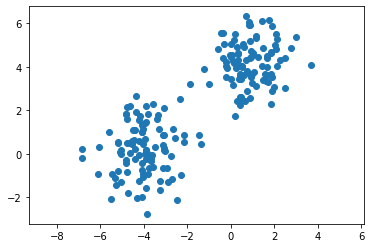

In [4]:
plt.scatter(X[:,0],X[:,1])
plt.axis('equal')

plt.show()

We can also plot the data with 'ground truth' colors to see what a perfect clustering algorithm should do.

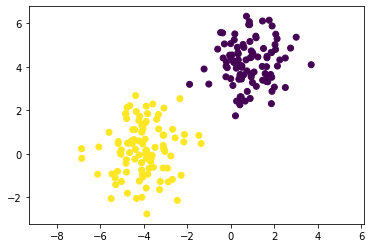

In [5]:
plt.scatter(X[:,0], X[:,1], c = y)
plt.axis('equal')

plt.show()

### Solving $K$-Means

Now let's try find the minizing partition $\mathcal{S}$ of our dataset. The solution can be approximated by, for example, gradient descent. Let's use the implementation from the package `sklearn`.

**Extra Time/Check it out yourself later if interested:** At the end of this notebook, try implementing an approximation of $K$-means 'from scratch'---i.e., without calling `sklearn` package to solve it for us. 

In [6]:
# Import the KMeans algorithm from sklearn
from sklearn.cluster import KMeans

K = 2 # Choose the number of clusters for KMeans.

# The following is common sklearn syntax. We 'fit' the KMeans model to our datset X. The variable kmeans that this
# returns then stores all of the information about KMeans for X that we are interested in.
kmeans = KMeans(n_clusters=K).fit(X)

We can extract labels determined by this algorithm.

In [7]:
kmeans.labels_

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0])

The above describes the 'optimal' partition $\mathcal{S}$. That is, $\mathcal{S} = \{S_1,S_2\}$. If a point gets label $0$ in the list above then it belongs to (say) $S_1$, whereas if it gets label $1$ then it belongs to $S_2$.

We can also extract the *cluster centers*.

In [8]:
kmeans.cluster_centers_

array([[-4.03900883,  0.19275413],
       [ 0.86365548,  4.17204079]])

These are the optimal $\mu_1$ (first column) and $\mu_2$ (second column) from the definition of $K$-Means. 

Let's plot everything together: We'll plot our datset $X$, color its points by the labels above and we'll also plot the cluster centers on the same scatter plot.

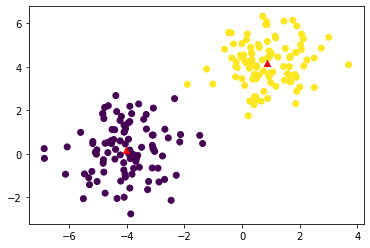

In [9]:
plt.scatter(X[:,0],X[:,1],c = kmeans.labels_)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],marker = '^', c = 'r')
plt.show()

Looks good!

### Changing the Number of Clusters

$K$-Means requires us to choose a number of clusters. If we choose the wrong number of clusters, we get bad results! This is an issue if we are dealing with high-dimensional data with an unknown 'ground truth'---in practice, this would frequently be the case.


Let's change the $K$ parameter in what we did above and see what happens.

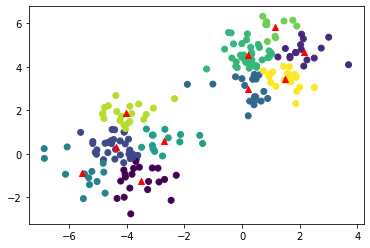

In [10]:
K = 10 # The only thing that needs to be changed

kmeans = KMeans(n_clusters=K).fit(X)
plt.scatter(X[:,0],X[:,1],c = kmeans.labels_)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],marker = '^', c = 'r')
plt.show()

Whichever $K$ we choose, we get some 'optimal' partition. If we don't choose $K$ correctly, this partition is not very meaningful. 

### Optional HW

Play around with the above code. Change parameters around to see what everything does. Going back to the beginning, you can change the dataset to have a different number of clusters or a different structure. One of the best ways to learn to code is to play with existing code in this way!

### Another Example --- 'Non Blobby' Data

Another issue with $K$-Means is that it's easy to construct datasets which the algorithm will not be able to handle.

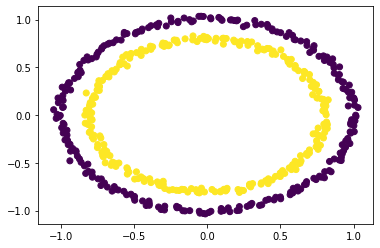

In [11]:
# Import another function for generating data
from sklearn.datasets import make_circles

X1, y1 = make_circles(n_samples=500, noise = 0.02, random_state = 2) 
# Some parameter choices here; feel free to tweak them

plt.scatter(X1[:,0],X1[:,1],c=y1)
plt.show()

Since $K$-Means operates by taking Euclidean means, we anticipate that it cannot find the 'true' clustering structure, no matter how we choose $K$. Let's test this.

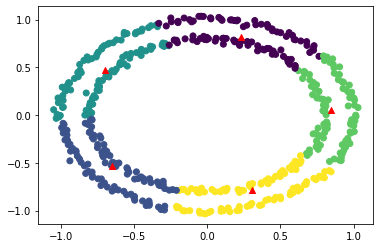

In [12]:
K = 5

kmeans = KMeans(n_clusters=K).fit(X1) # Changed the dataset to X1 here and in the next line
plt.scatter(X1[:,0],X1[:,1],c = kmeans.labels_)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],marker = '^', c = 'r')
plt.show()

## Summary: Issues with $K$-Means

We have observed the following issues:
- User must choose $K$. This might not always be obvious and *perhaps* there is not even a single true value for $K$. 
- By its nature, $K$-Means doesn't handle data which isn't 'blobby' very well.

There are workarounds for all of these issues ($K$-Means is very popular!), but we will introduce an alternative approach to which naturally overcomes them.